In [117]:
import numpy as np
from numpy import genfromtxt, savetxt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [118]:
all_centers = genfromtxt('Data/AllNoiseSimulatedData.csv', delimiter=',')
timestep = 0.00005
total_time = 500
print(len(all_centers))
print(np.std(all_centers))

10000000
0.2935554226645889


In [552]:
def measure(freq_L,idx):
    counts = 0.0
    for i in range(steps_per_measurement):
        counts_per_second = 100000*(1/4)*(1.25**2)/(np.power((all_centers[idx+i]-freq_L),2)+np.power(0.5*1.25,2))
        counts += counts_per_second*timestep
    counts += np.random.normal(loc=0.0, scale=np.sqrt(counts),size=1)
    return int(counts)

In [626]:
t_C = 0.1
t_L = 0.003
dt = 0.125
N = 2
#f_L = [-1,0,1]
f_L = [-1,1]

num_cycles = int(total_time/t_C) - 1
steps_per_cycle = int(t_C/timestep)
steps_per_measurement = int(t_L/timestep)
steps_per_prediction = int(dt/timestep)

centers = np.zeros(num_cycles)
counts = np.zeros([num_cycles,N])

In [627]:
for c in range(num_cycles):
    for l in range(N):
        counts[c][l] = measure(f_L[l],steps_per_cycle*c+steps_per_measurement*l)
    c1 = all_centers[steps_per_cycle*c+steps_per_measurement*N+steps_per_prediction-1]
    c2 = all_centers[steps_per_cycle*c+steps_per_measurement*N+steps_per_prediction]
    c3 = all_centers[steps_per_cycle*c+steps_per_measurement*N+steps_per_prediction+1]
    centers[c] = (c1+c2+c3)/3

In [628]:
centers_filename = "Data/centers_"+str(t_C)+"_"+str(t_L)+"_"+str(dt)+"_"+str(N)+".csv"
counts_filename = "Data/counts_"+str(t_C)+"_"+str(t_L)+"_"+str(dt)+"_"+str(N)+".csv"

savetxt(centers_filename, centers, delimiter=',')
savetxt(counts_filename, counts, delimiter=',')

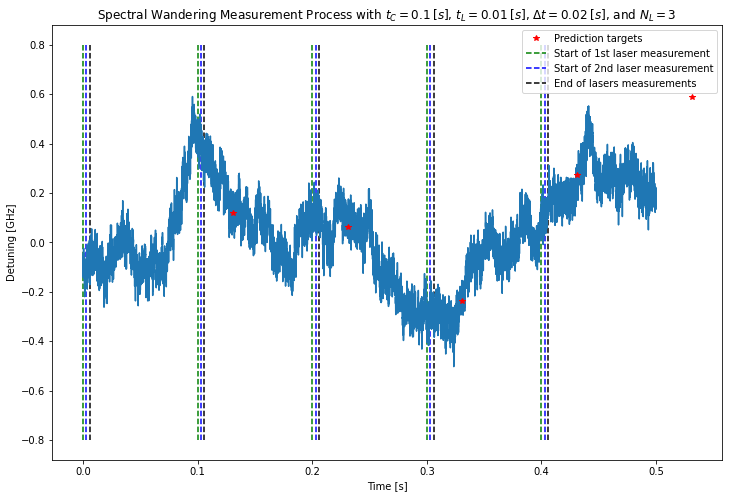

In [629]:
plt.rcParams['figure.figsize'] = [12,8]
plt.ylim = ([-1,1])
plt.xlabel("Time [s]")
plt.ylabel("Detuning [GHz]")
plt.title("Spectral Wandering Measurement Process with $t_C=0.1\: [s]$, $t_L=0.01\: [s]$, $\Delta t=0.02 \: [s]$, and $N_L=3$")

n = 10000
offset = 0
o = int(offset/steps_per_cycle)
times = np.arange(n)*timestep
ctrs = all_centers[offset:offset+n]
plt.plot(times,ctrs)

num_c = int(n*timestep/t_C)
starts = np.arange(num_c)*t_C
plt.plot(starts+N*t_L+dt,centers[o:o+num_c],"r*",label="Prediction targets")
laser_times_1 = np.zeros(num_c)
laser_times_2 = np.zeros(num_c)
laser_times_3 = np.zeros(num_c)
end_times = np.zeros(num_c)
for i in range(num_c):
    laser_times_1[i] = starts[i]
    laser_times_2[i] = starts[i] + t_L
    laser_times_3[i] = starts[i] + 2*t_L
    end_times[i] = starts[i] + N*t_L

lim = 0.8
plt.vlines(laser_times_1,lim,-lim,color="green",linestyle="--",label="Start of 1st laser measurement")
plt.vlines(laser_times_2,lim,-lim,color="blue",linestyle="--",label="Start of 2nd laser measurement")
#plt.vlines(laser_times_3,lim,-lim,color="m",linestyle="--",label="Start of 3rd laser measurement")
plt.vlines(end_times,lim,-lim,color="k",linestyle="--",label="End of lasers measurements")
plt.legend()

# Plot RF Measurement

In [544]:
def cps(b):
    return 100000*(1/4)*(1.25**2)/(np.power((b),2)+np.power(0.5*1.25,2))

Text(0.5, 1.0, 'Assumed RF Measurement Spectrum')

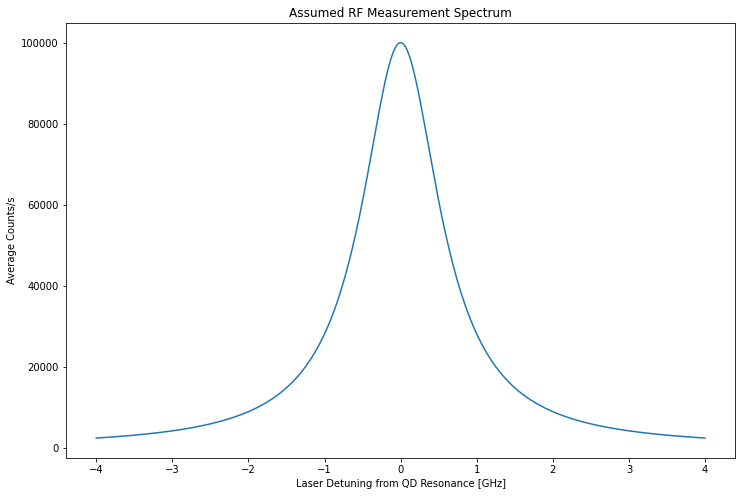

In [551]:
f = np.linspace(-4,4,1000)
c = cps(f)
plt.plot(f,c)
plt.xlabel("Laser Detuning from QD Resonance [GHz]")
plt.ylabel("Average Counts/s")
plt.title("Assumed RF Measurement Spectrum")